# Logistic Regression

##### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
file_path='C08_LogisticRegression_Social_Network_Ads.csv'
dataset = pd.read_csv(file_path)
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


####  Creating the matrix of features (X) and the dependent variable vector (y)

In [3]:
X=dataset.iloc[:,:-1].values
print(X)

y=dataset.iloc[:,-1].values
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

#### Split the data set into trainig and Test

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  1500

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

print(X_train)
print(X_test)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

#### Training the Logistic Regression model on the Training Set

In [6]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Predict a new Result

In [7]:
print(classifier.predict(sc.transform([[30,8000]])))

[0]


#### Predict the Test set Results

In [8]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


#### Making confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[52  6]
 [16 26]]


0.78

#### Visualising the trainig set Results

C:\Users\sujish_lee\AppData\Local\Temp\ipykernel_27516\399818484.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)


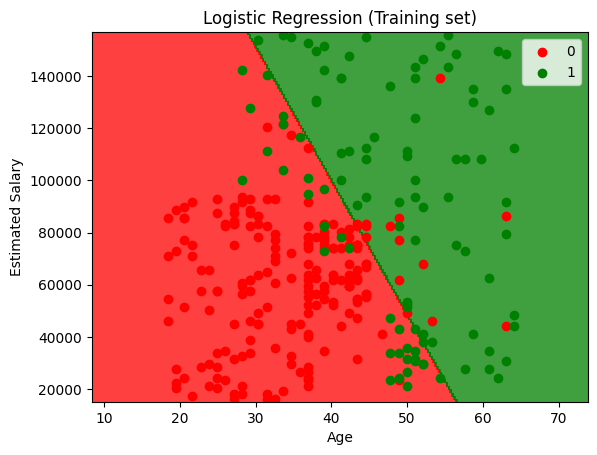

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualising the Test set Results

C:\Users\sujish_lee\AppData\Local\Temp\ipykernel_27516\4218306571.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)


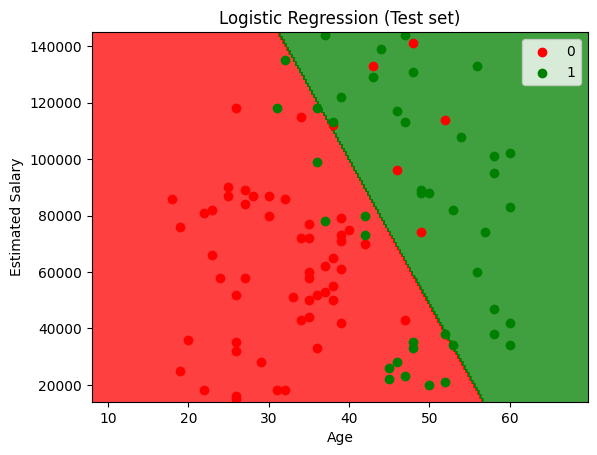

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['red', 'green'])(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()